In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

plt.rc('font', family='Malgun Gothic', size = 18)
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2

import seaborn as sns

In [129]:
ptDF = pd.read_csv('../못올리는거/행정동별대중교통수단통합.csv', sep=',', encoding='euc-kr')
ptDF

,기준_날짜,시작_행정동_ID,종료_행정동_ID,승객수
0,20220101.0,1112056.0,2305057.0,6.0
1,20220101.0,1113071.0,1113070.0,46.0
2,20220101.0,1102071.0,1125074.0,8.0
3,20220101.0,1105053.0,1110065.0,149.0
4,20220101.0,1104052.0,1102065.0,43.0
...,...,...,...,...
29993496,20220430.0,3102154.0,1104066.0,8.0
29993497,20220430.0,1112074.0,1115054.0,1.0
29993498,20220430.0,2308060.0,1123066.0,3.0
29993499,20220430.0,1123052.0,1123052.0,966.0


In [130]:
ptDF.info()
ptDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29993501 entries, 0 to 29993500
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준_날짜      float64
 1   시작_행정동_ID  float64
 2   종료_행정동_ID  float64
 3   승객수        float64
dtypes: float64(4)
memory usage: 915.3 MB


,기준_날짜,시작_행정동_ID,종료_행정동_ID,승객수
count,2.999350e+07,2.999350e+07,2.999350e+07,2.999350e+07
mean,1.868193e+07,1.592061e+06,1.585504e+06,2.718746e+01
std,5.360899e+06,8.410228e+05,8.373630e+05,9.786054e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.022012e+07,1.109073e+06,1.109072e+06,2.000000e+00
50%,2.022030e+07,1.119062e+06,1.119061e+06,4.000000e+00
75%,2.022040e+07,2.303062e+06,2.301065e+06,1.600000e+01
max,2.022043e+07,4.413358e+06,4.413358e+06,1.160000e+04


In [131]:
c1 = (ptDF['기준_날짜'] == 0)
c2 = (ptDF['시작_행정동_ID'] == 0)
c3 = (ptDF['종료_행정동_ID'] == 0)
(c1 | c2 | c3).unique()

array([False,  True])

In [134]:
ptDF = ptDF[(c1 | c2 | c3) == False]

In [135]:
for i in ptDF.columns[:3]:
    ptDF[i] = ptDF[i].astype('str')
ptDF.info()

C:\Users\bigdata\AppData\Local\Temp\ipykernel_4784\682447305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptDF[i] = ptDF[i].astype('str')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 27560766 entries, 0 to 29993500
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준_날짜      object 
 1   시작_행정동_ID  object 
 2   종료_행정동_ID  object 
 3   승객수        float64
dtypes: float64(1), object(3)
memory usage: 1.0+ GB


In [136]:
shGroup = ptDF.groupby(ptDF.columns[1:3].to_list()).agg('sum').sort_values('승객수', ascending=False)
shGroup = shGroup.head(30)
shGroup

,,승객수
시작_행정동_ID,종료_행정동_ID,
1114066.0,1114066.0,674595.0
1122066.0,1122066.0,466632.0
1112071.0,1112071.0,443971.0
1121073.0,1121058.0,427847.0
1101061.0,1101061.0,406154.0
1119054.0,1119054.0,387317.0
1122052.0,1124077.0,375931.0
1124077.0,1122052.0,353893.0
1123064.0,1123064.0,329071.0


Text(0.5, 0, '시작행정동 - 종료행정동')

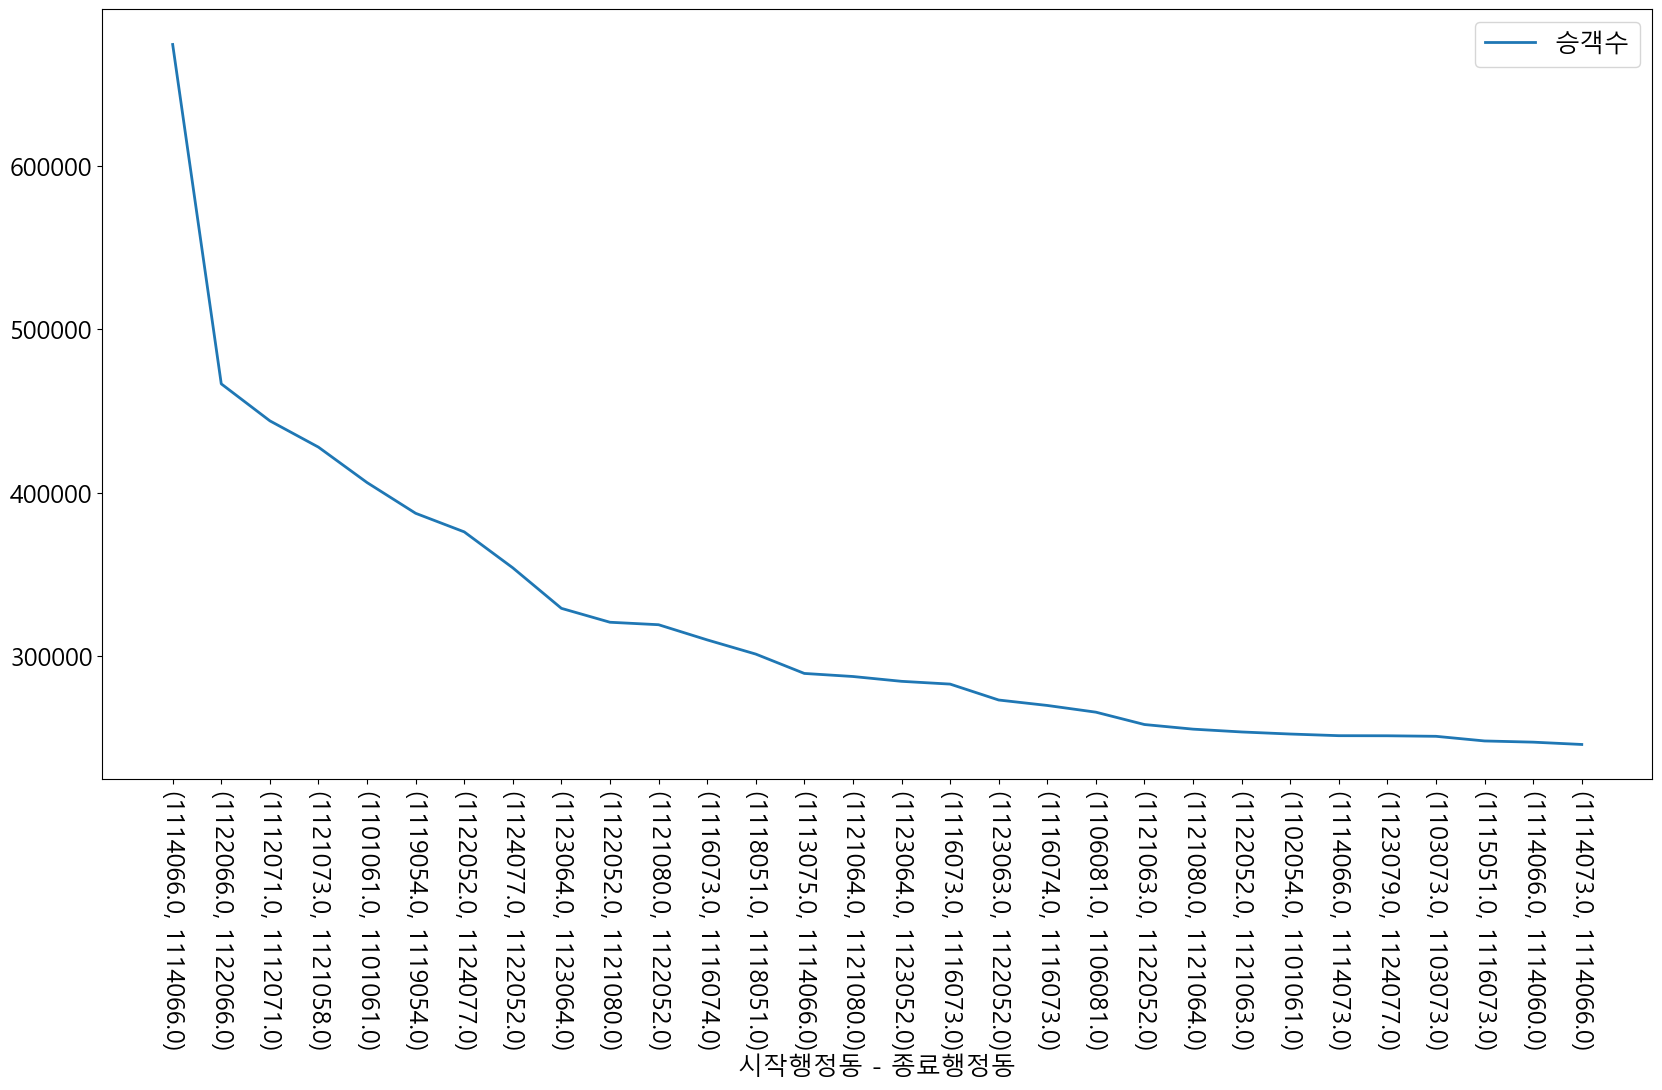

In [141]:
shGroup.plot(xticks=[i for i in range(30)])
plt.xticks(rotation=270)
plt.xlabel('시작행정동 - 종료행정동')

In [103]:
wow = shGroup.index
str(wow[0][0] + ' - ' + wow[0][1])

NameError: name 'concat' is not defined